In [ ]:
# Unzip data
# !unzip "/content/drive/MyDrive/PrescriptAid/EMNIST.zip" -d "/content/drive/MyDrive/PrescriptAid"

In [ ]:
# !pip install np_utils

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from sklearn.model_selection import train_test_split

import os
import tensorflow as tf
from tensorflow import keras
from tf_keras.models import Sequential, load_model
from keras import layers
from tf_keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

## Load Data



In [ ]:
bal_test_df = pd.read_csv("/content/drive/MyDrive/PrescriptAid/emnist-balanced-test.csv")
bal_test_df

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18794,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18795,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18796,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18797,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bal_train_df = pd.read_csv("/content/drive/MyDrive/PrescriptAid/emnist-balanced-train.csv")
bal_train_df

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112794,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112795,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bal_train_df.describe()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
count,112799.000000,112799.0,112799.0,112799.0,112799.0,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,...,112799.000000,112799.0,112799.0,112799.000000,112799.000000,112799.0,112799.0,112799.0,112799.0,112799.0
mean,22.999805,0.0,0.0,0.0,0.0,0.001365,0.011560,0.020701,0.017438,0.018475,...,0.000310,0.0,0.0,0.002163,0.000284,0.0,0.0,0.0,0.0,0.0
std,13.564622,0.0,0.0,0.0,0.0,0.235048,1.221831,1.658805,1.602485,1.719556,...,0.104211,0.0,0.0,0.726503,0.095279,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,23.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,35.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,46.000000,0.0,0.0,0.0,0.0,63.000000,192.000000,217.000000,217.000000,217.000000,...,35.000000,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
label_df = pd.read_csv("/content/drive/MyDrive/PrescriptAid/emnist-balanced-mapping.txt",
                       delimiter=" ",
                       index_col=0,
                       header=None).squeeze("columns")
label_df.head()

,1
0,
0,48
1,49
2,50
3,51
4,52


## Creating label dictionary

In [ ]:
label_dict = {}
for index, label in enumerate(label_df):
  label_dict[index] = chr(label)
label_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [ ]:
bal_train_df.drop_duplicates(inplace=True)

In [ ]:
bal_train_df.duplicated().sum()

0

In [ ]:
# Make sure the grayscale values to be between 0 t0 255
bal_train_df = np.clip(bal_train_df, 0, 255)

## Splitting the data into X and y

In [ ]:
bal_train_df.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = bal_train_df.iloc[:, 1:]
X.shape

(112797, 784)

In [ ]:
y = bal_train_df.iloc[:, 0]
y.shape

(112797,)

## Data Scaling

In [ ]:
X = X/255

## Visualize sample data

In [ ]:
sample_image = X.iloc[42]
sample_label = y.iloc[42]
sample_image.shape, sample_label

((784,), 22)

Label entry no. 42:  M


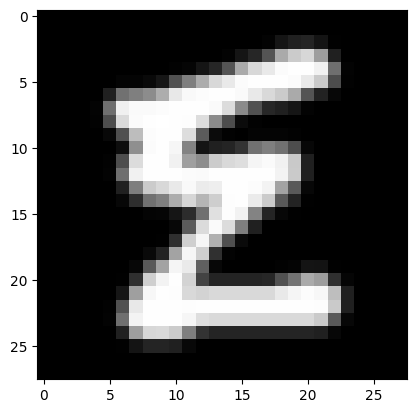

In [ ]:
w = 28
h = 28
print("Label entry no. 42: ", label_dict[sample_label])
plt.imshow(sample_image.values.reshape(w,h), cmap = plt.cm.gray)
plt.show()

As picture is rotated, creating function to flip and rotate images.

Label entry 42: M


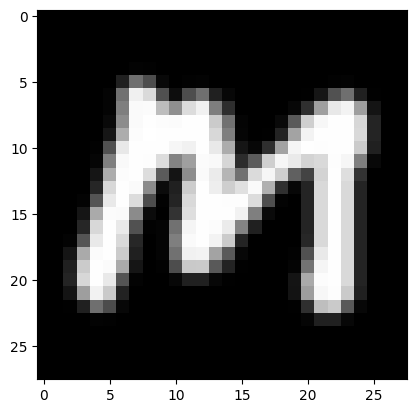

In [ ]:
def flip_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

print("Label entry 42:", label_dict[sample_label])
plt.imshow(flip_and_rotate(sample_image.values), cmap=plt.cm.gray)
plt.show()

Applying `flip_and_rotate()` to all images in X_train

In [ ]:
X = np.apply_along_axis(flip_and_rotate, 1, X.values)
X.shape

(112797, 28, 28)

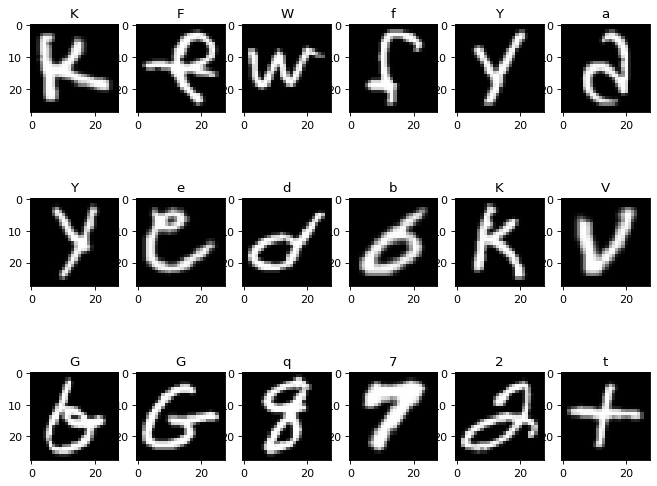

In [ ]:
plt.figure(figsize=(10,8), dpi=80)
for i in range(50, 68):
  plt.subplot(3,6,i-49)
  plt.imshow(X[i], cmap=plt.cm.gray)
  plt.title(label_dict[y[i]])

Reshaping the train data since tensorflow requires 4D array i.e. [batch, width, height, channel]

In [ ]:
X = X.reshape(-1, 28, 28, 1)
X.shape

(112797, 28, 28, 1)

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=88)

## Building model

In [ ]:
import tf_keras as tfk

In [ ]:
from tf_keras.models import Sequential
from tf_keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Input, Reshape, LSTM, Bidirectional

cnn_model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    MaxPool2D(strides=2),
    Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'),
    MaxPool2D(strides=2),
    # Flatten(),
    Reshape((25, 48)),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(256, activation='relu'),
    Dense(84, activation='relu'),
    Dropout(0.2),
    Dense(47, activation='softmax')
])

cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 reshape_1 (Reshape)         (None, 25, 48)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)              

In [ ]:
# Compile model
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
#Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
#Create a ReduceLROnPlateau callback
RLP = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

In [ ]:
# Save model
mcp_save = ModelCheckpoint("/content/drive/MyDrive/PrescriptAid/models", save_best_only=True, monitor = "val_loss", verbose=1, mode="auto")

In [ ]:
# Model fit
history = cnn_model.fit(X_train, y_train, epochs = 100, batch_size=32, verbose=1, validation_data = (X_test, y_test), callbacks = [early_stopping, RLP, mcp_save])

Epoch 1/100
2820/2820 [==============================] - ETA: 0s - loss: 0.9843 - accuracy: 0.6916
Epoch 1: val_loss improved from inf to 0.49588, saving model to /content/drive/MyDrive/PrescriptAid/models
2820/2820 [==============================] - 264s 88ms/step - loss: 0.9843 - accuracy: 0.6916 - val_loss: 0.4959 - val_accuracy: 0.8278 - lr: 0.0010
Epoch 2/100
2820/2820 [==============================] - ETA: 0s - loss: 0.4576 - accuracy: 0.8428
Epoch 2: val_loss improved from 0.49588 to 0.41566, saving model to /content/drive/MyDrive/PrescriptAid/models
2820/2820 [==============================] - 229s 81ms/step - loss: 0.4576 - accuracy: 0.8428 - val_loss: 0.4157 - val_accuracy: 0.8556 - lr: 0.0010
Epoch 3/100
2820/2820 [==============================] - ETA: 0s - loss: 0.3881 - accuracy: 0.8627
Epoch 3: val_loss improved from 0.41566 to 0.35412, saving model to /content/drive/MyDrive/PrescriptAid/models
2820/2820 [==============================] - 224s 79ms/step - loss: 0.3881 -

## Evaluate Model

In [ ]:
y_prob = cnn_model.predict(X_test)

705/705 [==============================] - 17s 22ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8925088652482269

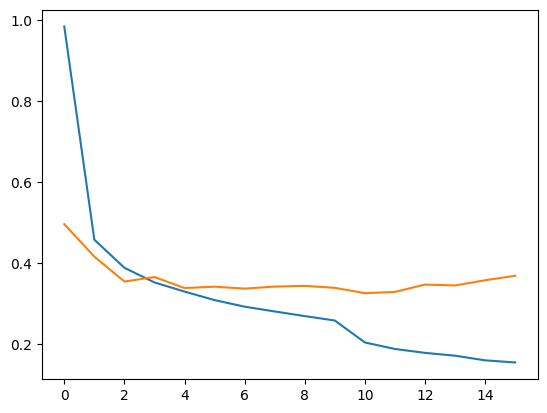

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

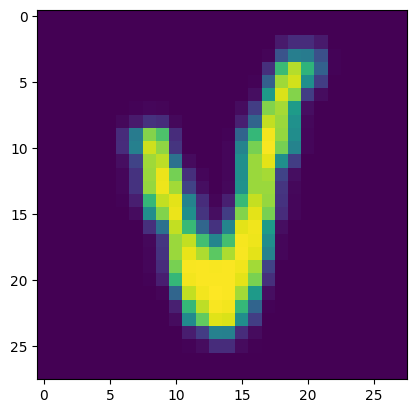

In [ ]:
plt.imshow(X_test[60])

In [ ]:
cnn_model.predict(X_test[52].reshape(1,28,28,1)).argmax(axis=1)

1/1 [==============================] - 0s 38ms/step


array([37])

In [ ]:
predicted_class = cnn_model.predict(X_test[60].reshape(1,28,28,1)).argmax(axis=1)

# Map the predicted class index to the corresponding label
predicted_label = label_dict[predicted_class[0]]
predicted_label

1/1 [==============================] - 0s 108ms/step


'V'